# 3-Year Recidivism for Prisoners from the State of Iowa

## **Data Exploration**

The dataset reports whether an offender is re-admitted to prison within three years of release or not. Studies have shown that if recidivism is to occur, it is most likely to happen within three years.

In [1]:
import matplotlib 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
#load data
recidivism_data = pd.read_pickle('RecidivismData_forAnalysis')

In [3]:
recidivism_data.shape

(21611, 17)

The original dataset has 21,646 records and 17 features.

In [4]:
recidivism_data.head()

,Fiscal Year Released,Recidivism Reporting Year,Race - Ethnicity,Sex,Age At Release,Convicting Offense Classification,Convicting Offense Type,Convicting Offense Subtype,Release Type,Main Supervising District,Recidivism - Return to Prison,Recidivism Type,Days to Recidivism,New Conviction Offense Classification,New Conviction Offense Type,New Conviction Offense Sub Type,Part of Target Population
0,2010.0,2013.0,White - Non-Hispanic,M,Under 25,D Felony,Violent,Assault,Parole,4JD,Yes,Tech,16,Unknown,Unknown,Unknown,Yes
1,2010.0,2013.0,White - Non-Hispanic,M,55 and Older,D Felony,Public Order,OWI,Parole,7JD,Yes,Tech,19,Unknown,Unknown,Unknown,Yes
2,2010.0,2013.0,White - Non-Hispanic,M,25-34,D Felony,Property,Burglary,Parole,5JD,Yes,Tech,22,Unknown,Unknown,Unknown,Yes
3,2010.0,2013.0,White - Non-Hispanic,M,55 and Older,C Felony,Drug,Trafficking,Parole,8JD,Yes,Tech,25,Unknown,Unknown,Unknown,Yes
4,2010.0,2013.0,Black - Non-Hispanic,M,25-34,D Felony,Drug,Trafficking,Parole,3JD,Yes,Tech,26,Unknown,Unknown,Unknown,Yes


In [5]:
recidivism_data['Fiscal Year Released'] = recidivism_data['Fiscal Year Released'].astype(int)
recidivism_data['Recidivism Reporting Year'] = recidivism_data['Recidivism Reporting Year'].astype(int)

**List of Attributes**

In [6]:
list(recidivism_data.columns)

['Fiscal Year Released',
 'Recidivism Reporting Year',
 'Race - Ethnicity',
 'Sex',
 'Age At Release ',
 'Convicting Offense Classification',
 'Convicting Offense Type',
 'Convicting Offense Subtype',
 'Release Type',
 'Main Supervising District',
 'Recidivism - Return to Prison',
 'Recidivism Type',
 'Days to Recidivism',
 'New Conviction Offense Classification',
 'New Conviction Offense Type',
 'New Conviction Offense Sub Type',
 'Part of Target Population']

Let's see at the values for each attribute:

**Fiscal Year Released**

In [7]:
recidivism_data['Fiscal Year Released'].value_counts(dropna=False)

2012    4707
2013    4687
2014    4585
2011    3916
2010    3716
Name: Fiscal Year Released, dtype: int64

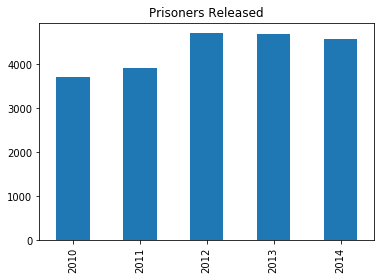

In [8]:
recidivism_data['Fiscal Year Released'].value_counts(dropna=False, sort=False).plot(kind='bar', title='Prisoners Released')

In [9]:
recidivism_byYr = recidivism_data.groupby(['Fiscal Year Released','Recidivism - Return to Prison']).size().unstack()
recidivism_byYr

Recidivism - Return to Prison,No,Yes
Fiscal Year Released,,
2010,2589,1127
2011,2754,1162
2012,3197,1510
2013,3082,1605
2014,2962,1623


In [10]:
for i in recidivism_byYr.index:
    print(recidivism_byYr.loc[i,'Yes']/(recidivism_byYr.loc[i,'Yes'] + recidivism_byYr.loc[i,'No']))

0.303283100108
0.296731358529
0.320798810283
0.342436526563
0.353980370774


The recidivism rate by year ranged from 29.7 (for prisoners released in 2011) to 35.4% (for prisoners released in 2014). The average recidivism for the five-year period is 32.5%. 

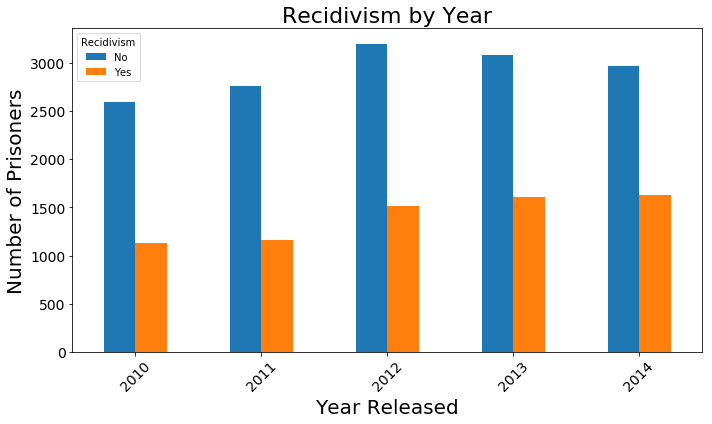

In [11]:
fig, ax = plt.subplots()
recidivism_data.groupby(['Fiscal Year Released','Recidivism - Return to Prison']).size().unstack().\
plot(kind='bar',ax=ax,figsize=(10,6),fontsize=14, rot=45)
ax.set_title('Recidivism by Year', fontsize=22)
ax.set_xlabel('Year Released', fontsize=20)
ax.set_ylabel('Number of Prisoners', fontsize=20)
ax.legend(title='Recidivism')
plt.tight_layout()
plt.savefig('recidivism_ByYear.eps',format = 'eps',dpi = 1300)
plt.show()

**Recidivism Reporting Year**

In [12]:
recidivism_data['Recidivism Reporting Year'].value_counts(dropna=False)

2015    4707
2016    4687
2017    4585
2014    3916
2013    3716
Name: Recidivism Reporting Year, dtype: int64

**Race - Ethnicity**

In [13]:
recidivism_byRace = recidivism_data.groupby(['Race - Ethnicity','Recidivism - Return to Prison']).size()
recidivism_byRace

Race - Ethnicity                                 Recidivism - Return to Prison
American Indian or Alaska Native - Hispanic      No                                 11
                                                 Yes                                 5
American Indian or Alaska Native - Non-Hispanic  No                                245
                                                 Yes                               159
Asian or Pacific Islander - Hispanic             No                                  1
                                                 Yes                                 2
Asian or Pacific Islander - Non-Hispanic         No                                130
                                                 Yes                                39
Black -                                          No                                  2
Black - Hispanic                                 No                                 22
                                                 Ye

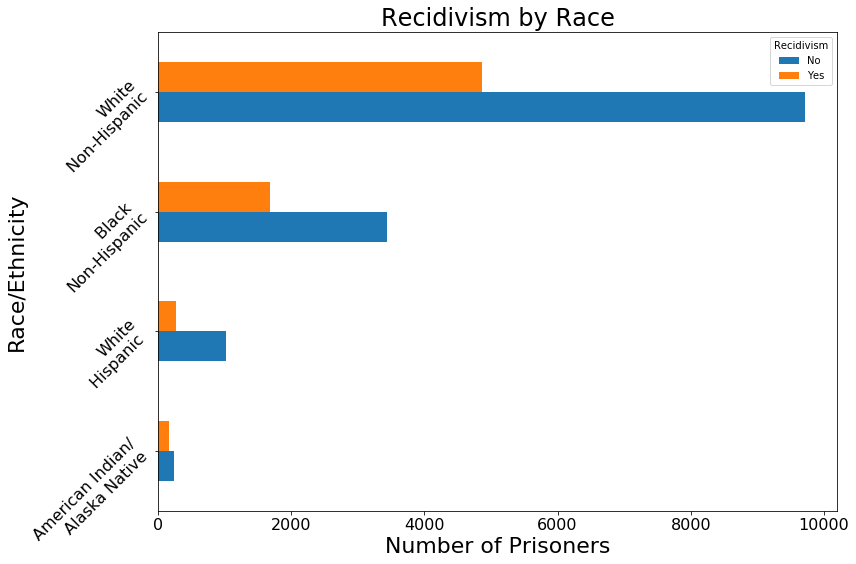

In [14]:
grouped = recidivism_data.groupby(['Race - Ethnicity','Recidivism - Return to Prison']).size().unstack()
fig, ax = plt.subplots()
grouped[(grouped['No'] > 100) &(grouped['Yes'] > 100)].sort_values(by='No').plot(kind='barh',ax=ax,figsize=(12,8),fontsize=16, rot=45)
ax.set_yticklabels(['American Indian/\n Alaska Native','White\n Hispanic ', 'Black \nNon-Hispanic', 'White\n Non-Hispanic'])
ax.set_title('Recidivism by Race', fontsize=24)
ax.set_xlabel('Number of Prisoners', fontsize=22)
ax.set_ylabel('Race/Ethnicity', fontsize=22)
ax.legend(title='Recidivism')
plt.tight_layout()
plt.savefig('recidivism_ByRace.eps',format = 'eps',dpi = 1300)
plt.show()

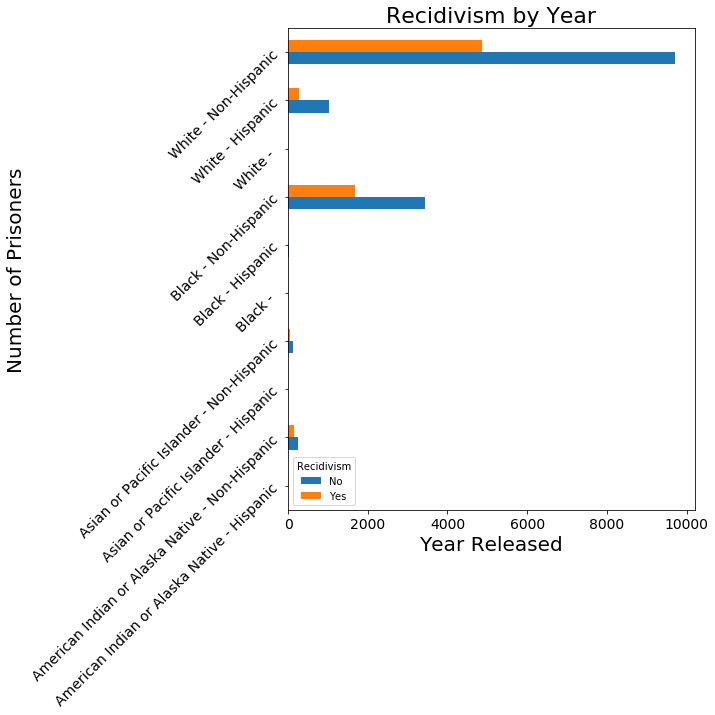

In [15]:
fig, ax = plt.subplots()
recidivism_data.groupby(['Race - Ethnicity','Recidivism - Return to Prison']).size().sort_values().unstack().\
plot(kind='barh',ax=ax,figsize=(10,10),fontsize=14, rot=45)
ax.set_title('Recidivism by Year', fontsize=22)
ax.set_xlabel('Year Released', fontsize=20)
ax.set_ylabel('Number of Prisoners', fontsize=20)
ax.legend(title='Recidivism')
plt.tight_layout()
plt.savefig('recidivism_ByRace2.eps',format = 'eps',dpi = 1300)
plt.show()

In [16]:
recidivism_data['Race - Ethnicity'].value_counts(dropna=False)

White - Non-Hispanic                               14586
Black - Non-Hispanic                                5106
White - Hispanic                                    1284
American Indian or Alaska Native - Non-Hispanic      404
Asian or Pacific Islander - Non-Hispanic             169
Black - Hispanic                                      30
American Indian or Alaska Native - Hispanic           16
White -                                               11
Asian or Pacific Islander - Hispanic                   3
Black -                                                2
Name: Race - Ethnicity, dtype: int64

The "Race - Ethnicity" attribute has two names for missing values: 'NaN' (30 records) and 'N/A - ' (5 records). Convert 'N/A - ' to NaN to easily manipulate data in pandas. 

In [17]:
recidivism_data['Race - Ethnicity'].value_counts(dropna=False)

White - Non-Hispanic                               14586
Black - Non-Hispanic                                5106
White - Hispanic                                    1284
American Indian or Alaska Native - Non-Hispanic      404
Asian or Pacific Islander - Non-Hispanic             169
Black - Hispanic                                      30
American Indian or Alaska Native - Hispanic           16
White -                                               11
Asian or Pacific Islander - Hispanic                   3
Black -                                                2
Name: Race - Ethnicity, dtype: int64

The "The "Race - Ethnicity" attribute now shows one name for missing values: 'NAN' (35 records)

**Sex**

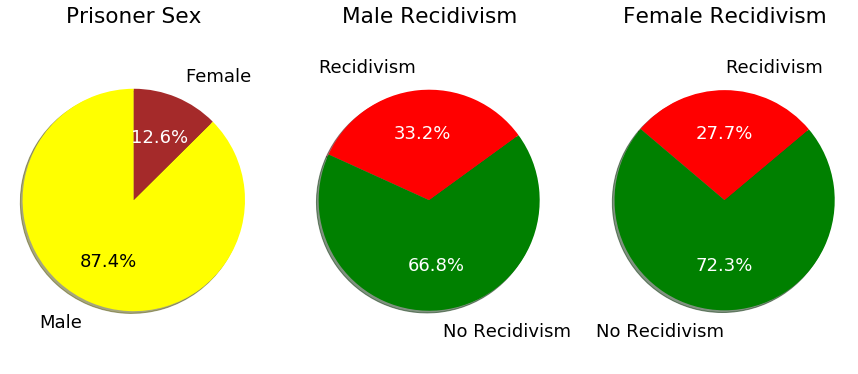

In [18]:
matplotlib.rcParams['axes.titlepad'] = 14 
matplotlib.rcParams['font.size'] = 18
#labels = 'New', 'Technical','No'
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15, 6))
labels_sex = 'Male','Female'
sizes_sex = [18896, 2715]
labels_male = 'Recidivism', 'No Recidivism'
sizes_male = [6275, 12621]
labels_female = 'Recidivism', 'No Recidivism'
sizes_female = [752, 1963]

colors_sex = ['yellow','brown']
colors = ['red','green']

patches1, texts1, autotexts1=ax1.pie(sizes_sex, labels=labels_sex, labeldistance = 1.2, colors=colors_sex,
        autopct='%1.1f%%', shadow=True, startangle=90)
autotexts1[1].set_color('w')
ax1.set_title('Prisoner Sex') 
ax1.axis('equal')

patches2, texts2, autotexts2=ax2.pie(sizes_male, labels=labels_male, labeldistance = 1.2, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=36)

autotexts2[0].set_color('w')
autotexts2[1].set_color('w')
ax2.set_title('Male Recidivism')
ax2.axis('equal')

patches3, texts3, autotexts3=ax3.pie(sizes_female, labels=labels_female, labeldistance = 1.2, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=40) 
autotexts3[0].set_color('w')
autotexts3[1].set_color('w')
ax3.set_title('Female Recidivism')
ax3.axis('equal')
plt.savefig('recidivism_BySex.eps',format = 'eps',dpi = 1300)
plt.show()

In [19]:
recidivism_data['Sex'].value_counts(dropna=False)

M    18896
F     2715
Name: Sex, dtype: int64

In [20]:
recidivism_data.groupby(['Sex','Recidivism - Return to Prison']).size()

Sex  Recidivism - Return to Prison
F    No                                1963
     Yes                                752
M    No                               12621
     Yes                               6275
dtype: int64

**Age at release**

In [21]:
recidivism_data['Age At Release '].value_counts(dropna=False)

25-34           7907
35-44           5167
Under 25        3840
45-54           3632
55 and Older    1065
Name: Age At Release , dtype: int64

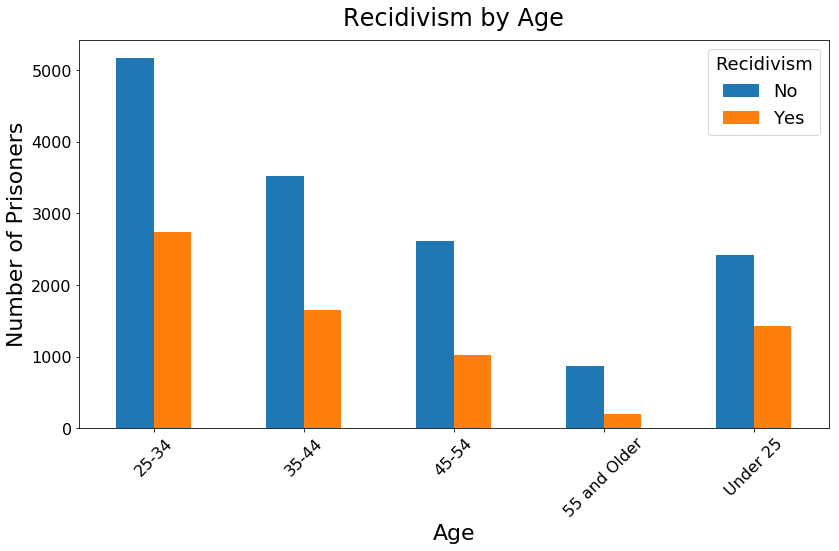

In [22]:
Age_Sex_grouped = recidivism_data.groupby(['Age At Release ','Recidivism - Return to Prison']).size().unstack()
fig, ax = plt.subplots()
Age_Sex_grouped.plot(kind='bar',ax=ax,figsize=(12,8),fontsize=16, rot=45)
ax.set_title('Recidivism by Age', fontsize=24)
ax.set_xlabel('Age', fontsize=22)
ax.set_ylabel('Number of Prisoners', fontsize=22)
ax.legend(title='Recidivism')
plt.tight_layout()
plt.savefig('recidivism_ByAge.eps',format = 'eps',dpi = 1300)
plt.show()

In [23]:
recidivism_byAge = recidivism_data.groupby(['Age At Release ','Recidivism - Return to Prison']).size().unstack()
recidivism_byAge

Recidivism - Return to Prison,No,Yes
Age At Release,,
25-34,5169,2738
35-44,3522,1645
45-54,2617,1015
55 and Older,862,203
Under 25,2414,1426


In [24]:
for i in recidivism_byAge.index:
    print(recidivism_byAge.loc[i,'Yes']/(recidivism_byAge.loc[i,'Yes'] + recidivism_byAge.loc[i,'No']))

0.346275452131
0.318366556996
0.279460352423
0.190610328638
0.371354166667


The distribution of prisoners by age shows that the 36.6% of the total released prisoners belong to that age group of 25-34. The representation of the other age groups in the released prisoners is 35-44 (23.9%), under 25 (17.8%), 45-54 (16.8%), and over 55 (4.9%). The recidivism rate for the age groups under 25, 25-34, 35-44, 45-54, and over 55 is 37.1, 34.6, 31.8, 28.0, and 19.1% respectively. This suggests recidivism is highest for the age group under 25 and the lowest for age group over 55 years. 

**Convicting Offense Classification**

In [25]:
recidivism_data['Convicting Offense Classification'].value_counts(dropna=False)/recidivism_data['Convicting Offense Classification'].count()

D Felony                                    0.405442
C Felony                                    0.261765
Aggravated Misdemeanor                      0.187960
B Felony                                    0.069039
Felony - Enhancement to Original Penalty    0.055481
Felony - Enhanced                           0.010180
Serious Misdemeanor                         0.005923
Special Sentence 2005                       0.003193
Felony - Mandatory Minimum                  0.000416
A Felony                                    0.000139
Other Felony                                0.000139
Simple Misdemeanor                          0.000093
Other Felony (Old Code)                     0.000093
Sexual Predator Community Supervision       0.000093
Other Misdemeanor                           0.000046
Name: Convicting Offense Classification, dtype: float64

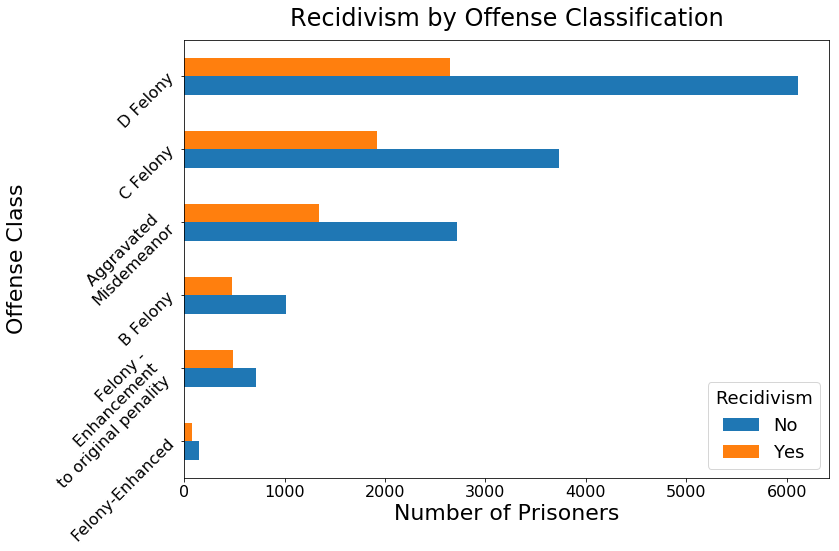

In [26]:
grouped_offenseclass = recidivism_data.groupby(['Convicting Offense Classification','Recidivism - Return to Prison']).size().unstack()
fig, ax = plt.subplots()
grouped_offenseclass[(grouped_offenseclass['No'] > 50) &(grouped_offenseclass['Yes'] > 50)].sort_values(by='No').plot(kind='barh',ax=ax,figsize=(12,8),fontsize=16, rot=45)
ax.set_yticklabels(['Felony-Enhanced','Felony - \nEnhancement \nto original penality ', 
                    'B Felony', 'Aggravated \nMisdemeanor', 'C Felony', 'D Felony'])
ax.set_title('Recidivism by Offense Classification', fontsize=24)
ax.set_xlabel('Number of Prisoners', fontsize=22)
ax.set_ylabel('Offense Class', fontsize=22)
ax.legend(title='Recidivism')
plt.tight_layout()
plt.savefig('recidivism_ByOffenseclass.eps',format = 'eps',dpi = 1300)
plt.show()

In [27]:
recidivism_byClass=recidivism_data.groupby(['Convicting Offense Classification','Recidivism - Return to Prison']).size()
recidivism_byClass

Convicting Offense Classification         Recidivism - Return to Prison
A Felony                                  No                                  3
Aggravated Misdemeanor                    No                               2718
                                          Yes                              1344
B Felony                                  No                               1014
                                          Yes                               478
C Felony                                  No                               3736
                                          Yes                              1921
D Felony                                  No                               6114
                                          Yes                              2648
Felony - Enhanced                         No                                143
                                          Yes                                77
Felony - Enhancement to Original Penalty  No    

**Convicting Offense Type**

In [28]:
recidivism_data['Convicting Offense Type'].value_counts(dropna=False)

Drug            6595
Property        6084
Violent         4843
Public Order    3090
Other            999
Name: Convicting Offense Type, dtype: int64

**Convicting Offense Subtype**

In [29]:
recidivism_data['Convicting Offense Subtype'].value_counts(dropna=False)

Trafficking                        5419
Assault                            2640
Burglary                           2447
Theft                              2197
OWI                                1568
Sex                                1062
Forgery/Fraud                      1001
Drug Possession                     933
Other Criminal                      890
Other Violent                       491
Traffic                             451
Murder/Manslaughter                 348
Weapons                             300
Alcohol                             298
Vandalism                           295
Robbery                             290
Other Drug                          243
Other Public Order                  241
Arson                               136
Sex Offender Registry/Residency     129
Flight/Escape                        69
Special Sentence Revocation          63
Kidnap                               53
Prostitution/Pimping                 34
Stolen Property                       8


In [96]:
recidivism_data[recidivism_data['Recidivism - Return to Prison'] == "Yes"]['Convicting Offense Subtype'].value_counts(dropna=False)

Trafficking                        1909
Burglary                            925
Theft                               762
Assault                             708
Other Criminal                      384
OWI                                 380
Forgery/Fraud                       352
Drug Possession                     336
Sex                                 306
Traffic                             140
Other Violent                       131
Alcohol                             115
Weapons                              84
Vandalism                            81
Other Public Order                   79
Other Drug                           72
Robbery                              67
Murder/Manslaughter                  43
Sex Offender Registry/Residency      39
Arson                                34
Flight/Escape                        31
Special Sentence Revocation          29
Prostitution/Pimping                 10
Kidnap                                6
Stolen Property                       3


In [97]:
recidivism_data['Convicting Offense Subtype'].value_counts(dropna=False)/recidivism_data['Convicting Offense Subtype'].count()

Trafficking                        0.250752
Assault                            0.122160
Burglary                           0.113229
Theft                              0.101661
OWI                                0.072556
Sex                                0.049142
Forgery/Fraud                      0.046319
Drug Possession                    0.043172
Other Criminal                     0.041183
Other Violent                      0.022720
Traffic                            0.020869
Murder/Manslaughter                0.016103
Weapons                            0.013882
Alcohol                            0.013789
Vandalism                          0.013650
Robbery                            0.013419
Other Drug                         0.011244
Other Public Order                 0.011152
Arson                              0.006293
Sex Offender Registry/Residency    0.005969
Flight/Escape                      0.003193
Special Sentence Revocation        0.002915
Kidnap                          

In [111]:
recidivism_byoffensesubtype = recidivism_data.groupby(['Convicting Offense Subtype','Recidivism - Return to Prison']).size().unstack()
for i in recidivism_byoffensesubtype.index:
    print(recidivism_byoffensesubtype.loc[i],recidivism_byoffensesubtype.loc[i,'Yes']/(recidivism_byoffensesubtype.loc[i,'Yes'] + recidivism_byoffensesubtype.loc[i,'No']))

Recidivism - Return to Prison
No     183
Yes    115
Name: Alcohol, dtype: int64 0.385906040268
Recidivism - Return to Prison
No     4
Yes    1
Name: Animals, dtype: int64 0.2
Recidivism - Return to Prison
No     102
Yes     34
Name: Arson, dtype: int64 0.25
Recidivism - Return to Prison
No     1932
Yes     708
Name: Assault, dtype: int64 0.268181818182
Recidivism - Return to Prison
No     1522
Yes     925
Name: Burglary, dtype: int64 0.378013894565
Recidivism - Return to Prison
No     597
Yes    336
Name: Drug Possession, dtype: int64 0.360128617363
Recidivism - Return to Prison
No     38
Yes    31
Name: Flight/Escape, dtype: int64 0.449275362319
Recidivism - Return to Prison
No     649
Yes    352
Name: Forgery/Fraud, dtype: int64 0.351648351648
Recidivism - Return to Prison
No     47
Yes     6
Name: Kidnap, dtype: int64 0.11320754717
Recidivism - Return to Prison
No     305
Yes     43
Name: Murder/Manslaughter, dtype: int64 0.123563218391
Recidivism - Return to Prison
No     1188
Yes 

In [30]:
rec1 = recidivism_data[recidivism_data['Recidivism - Return to Prison'] == "Yes"][['Recidivism Reporting Year','Convicting Offense Subtype']]

In [31]:
rec2 = recidivism_data[recidivism_data['Recidivism - Return to Prison'] == "No"][['Recidivism Reporting Year','Convicting Offense Subtype']]

In [32]:
rec1_c = pd.DataFrame({'count' : rec1.groupby(['Recidivism Reporting Year','Convicting Offense Subtype' ]).size()}).reset_index()

In [33]:
offense_list_2013 = list(rec1_c[rec1_c['Recidivism Reporting Year'] == 2013]['Convicting Offense Subtype'])
offense_list_2014 = list(rec1_c[rec1_c['Recidivism Reporting Year'] == 2014]['Convicting Offense Subtype'])
offense_list_2015 = list(rec1_c[rec1_c['Recidivism Reporting Year'] == 2015]['Convicting Offense Subtype'])
offense_list_2016 = list(rec1_c[rec1_c['Recidivism Reporting Year'] == 2016]['Convicting Offense Subtype'])
offense_list_2017 = list(rec1_c[rec1_c['Recidivism Reporting Year'] == 2017]['Convicting Offense Subtype'])


In [34]:
count_list_2013 = list(rec1_c[rec1_c['Recidivism Reporting Year'] == 2013]['count'])
count_list_2014 = list(rec1_c[rec1_c['Recidivism Reporting Year'] == 2014]['count'])
count_list_2015 = list(rec1_c[rec1_c['Recidivism Reporting Year'] == 2015]['count'])
count_list_2016 = list(rec1_c[rec1_c['Recidivism Reporting Year'] == 2016]['count'])
count_list_2017 = list(rec1_c[rec1_c['Recidivism Reporting Year'] == 2017]['count'])

In [35]:
rec2_c = pd.DataFrame({'count' : rec2.groupby(['Recidivism Reporting Year','Convicting Offense Subtype' ]).size()}).reset_index()

In [36]:
rec2_offense_list_2013 = list(rec2_c[rec2_c['Recidivism Reporting Year'] == 2013]['Convicting Offense Subtype'])
rec2_offense_list_2014 = list(rec2_c[rec2_c['Recidivism Reporting Year'] == 2014]['Convicting Offense Subtype'])
rec2_offense_list_2015 = list(rec2_c[rec2_c['Recidivism Reporting Year'] == 2015]['Convicting Offense Subtype'])
rec2_offense_list_2016 = list(rec2_c[rec2_c['Recidivism Reporting Year'] == 2016]['Convicting Offense Subtype'])
rec2_offense_list_2017 = list(rec2_c[rec2_c['Recidivism Reporting Year'] == 2017]['Convicting Offense Subtype'])
rec2_count_list_2013 = list(rec2_c[rec2_c['Recidivism Reporting Year'] == 2013]['count'])
rec2_count_list_2014 = list(rec2_c[rec2_c['Recidivism Reporting Year'] == 2014]['count'])
rec2_count_list_2015 = list(rec2_c[rec2_c['Recidivism Reporting Year'] == 2015]['count'])
rec2_count_list_2016 = list(rec2_c[rec2_c['Recidivism Reporting Year'] == 2016]['count'])
rec2_count_list_2017 = list(rec2_c[rec2_c['Recidivism Reporting Year'] == 2017]['count'])

In [37]:
len(rec2_offense_list_2013)
    

26

In [113]:
from bokeh.io import show, output_notebook
output_notebook()
from bokeh.io import export_png
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource
from bokeh.palettes import GnBu5, OrRd5

years = ['2013','2014','2015','2016','2017']

rec_yes = {'offense_list' : offense_list_2015,
           '2013' : [13,0,3,115,143,61,5,59,1,7,49,6,23,1,23,1,16,39,21,4,0,154,28,333,14,8],
           '2014' : [24,0,8,133,160,46,1,57,2,7,64,74,4,28,28,3,10,54,0,0,1,130,19,278,16,15],
           '2015' : [22,1,4,163,208,73,8,88,1,7,101,12,18,3,21,2,19,70,18,25,2,161,26,417,18,21],
           '2016' : [31,0,7,140,218,78,6,73,1,13,84,152,13,21,29,3,13,70,0,0,0,166,34,409,22,22],
           '2017' : [24,0,12,157,196,78,11,75,1,9,82,140,14,26,30,1,9,73,0,0,0,151,33,472,11,18]
           }

rec_no = {'offense_list_2013' : rec2_offense_list_2013,
           '2013' : [-28,-1,-23,-304,-261,-93,-8,-116,-9,-55,-194,-20,-50,-4,-63,-4,-48,-162,-44,-3,-2,-307,-70,-659,-39,-22],
           '2014' : [-34,-1,-10,-391,-296,-120,-14,-126,-11,-46,-228,-85,-25,-48,-63,-3,-42,-163,-0,-0,-1,-238,-62,-650,-53,-44],
           '2015' : [-46,-2,-19,-426,-356,-132,-6,-146,-7,-65,-300,-22,-39,-11,-65,-5,-55,-159,-46,-31,-1,-330,-62,-769,-48,-49],
           '2016' : [-35,0,-34,-429,-283,-131,-5,-118,-14,-85,-248,-177,-24,-51,-108,-5,-45,-137,0,0,-1,-287,-56,-717,-40,-52],
           '2017' : [-40,0,-16,-382,-326,-121,-5,-143,-6,-54,-218,-202,-33,-48,-61,-7,-33,-135,0,0,0,-273,-61,-715,-34,-49]
           }
p = figure(y_range=offense_list_2015, plot_height=800,plot_width=800, x_range=(-3700, 2200), \
           x_axis_label = "number of prisoners (negative indicates no recidivism)",\
           title="Prisoner Release/Recidivism by offense subtype"
           
          )

p.hbar_stack(years, y='offense_list', height=0.9, color=OrRd5, source=ColumnDataSource(rec_yes),
             legend=["%s recidivism" % x for x in years])
p.hbar_stack(years, y='offense_list_2013', height=0.9, color=GnBu5, source=ColumnDataSource(rec_no),
             legend=["%s no recidivism" % x for x in years])



p.y_range.range_padding = 0.1
p.ygrid.grid_line_color = None
p.legend.location = "center_left"
p.xaxis.axis_label_text_font_style = "normal"
p.xaxis.axis_label_text_font_size = "16pt"
p.xaxis.major_label_text_font_size = "16pt"
p.yaxis.major_label_text_font_size = "14pt"
p.title.text_font_size = "14pt"

export_png(p, filename="plot.png")

show(p)

Loading BokehJS ...

/anaconda3/lib/python3.6/site-packages/selenium/webdriver/phantomjs/webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '


In [39]:
from bokeh.io import show, output_notebook
output_notebook()
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource
from bokeh.palettes import GnBu5, OrRd5

years = ['2013','2014','2015','2016','2017']

rec_yes = {'offense_list' : offense_list_2015,
           '2013' : [13,0,3,115,143,61,5,59,1,7,49,6,23,1,23,1,16,39,21,4,0,154,28,333,14,8],
           '2014' : [24,0,8,133,160,46,1,57,2,7,64,74,4,28,28,3,10,54,0,0,1,130,19,278,16,15],
           '2015' : [22,1,4,163,208,73,8,88,1,7,101,12,18,3,21,2,19,70,18,25,2,161,26,417,18,21],
           '2016' : [31,0,7,140,218,78,6,73,1,13,84,152,13,21,29,3,13,70,0,0,0,166,34,409,22,22],
           '2017' : [24,0,12,157,196,78,11,75,1,9,82,140,14,26,30,1,9,73,0,0,0,151,33,472,11,18]
           }

rec_no = {'offense_list_2013' : rec2_offense_list_2013,
           '2013' : [-28,-1,-23,-304,-261,-93,-8,-116,-9,-55,-194,-20,-50,-4,-63,-4,-48,-162,-44,-3,-2,-307,-70,-659,-39,-22],
           '2014' : [-34,-1,-10,-391,-296,-120,-14,-126,-11,-46,-228,-85,-25,-48,-63,-3,-42,-163,-0,-0,-1,-238,-62,-650,-53,-44],
           '2015' : [-46,-2,-19,-426,-356,-132,-6,-146,-7,-65,-300,-22,-39,-11,-65,-5,-55,-159,-46,-31,-1,-330,-62,-769,-48,-49],
           '2016' : [-35,0,-34,-429,-283,-131,-5,-118,-14,-85,-248,-177,-24,-51,-108,-5,-45,-137,0,0,-1,-287,-56,-717,-40,-52],
           '2017' : [-40,0,-16,-382,-326,-121,-5,-143,-6,-54,-218,-202,-33,-48,-61,-7,-33,-135,0,0,0,-273,-61,-715,-34,-49]
           }
p = figure(x_range=offense_list_2015, plot_height=550,plot_width=900, y_range=(-800, 600), title="Prisoner Release/Recidivism by year")

p.vbar_stack(years, x='offense_list', width=0.9, color=GnBu5, source=ColumnDataSource(rec_yes),
             legend=["%s rec_yes" % y for y in years])
p.vbar_stack(years, x='offense_list_2013', width=0.9, color=OrRd5, source=ColumnDataSource(rec_no),
             legend=["%s rec_no" % y for y in years])



p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.legend.location = "center_left"
p.xaxis.major_label_orientation = 45
export_png(p, filename="plot2.png")
show(p)

Loading BokehJS ...

/anaconda3/lib/python3.6/site-packages/selenium/webdriver/phantomjs/webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '


**Release Type**

In [40]:
recidivism_data['Release Type'].value_counts(dropna=False)

Parole                                 9810
Discharged – End of Sentence           5006
Parole Granted                         2883
Unknown                                1761
Discharged - Expiration of Sentence    1215
Special Sentence                        347
Paroled w/Immediate Discharge           204
Released to Special Sentence            172
Paroled to Detainer - INS                81
Paroled to Detainer - Out of State       56
Paroled to Detainer - Iowa               41
Paroled to Detainer - U.S. Marshall      35
Name: Release Type, dtype: int64

There are 1,762 records with missing values for the attribute 'Release Type'. Convert 'NaN' to 'Unknown' value.

In [41]:
recidivism_data['Release Type'].value_counts(dropna=False)

Parole                                 9810
Discharged – End of Sentence           5006
Parole Granted                         2883
Unknown                                1761
Discharged - Expiration of Sentence    1215
Special Sentence                        347
Paroled w/Immediate Discharge           204
Released to Special Sentence            172
Paroled to Detainer - INS                81
Paroled to Detainer - Out of State       56
Paroled to Detainer - Iowa               41
Paroled to Detainer - U.S. Marshall      35
Name: Release Type, dtype: int64

**Main Supervising District**

In [42]:
recidivism_data['Main Supervising District'].value_counts(dropna=False)

Unknown               8436
5JD                   3970
1JD                   2188
2JD                   1526
7JD                   1262
8JD                   1253
3JD                    931
6JD                    873
4JD                    513
ISC                    350
Interstate Compact     309
Name: Main Supervising District, dtype: int64

There are 8,470 records with missing values for the attribute 'Main Supervising District'. Convert 'NaN' to 'Unknown' value.

In [43]:
recidivism_data['Main Supervising District'].value_counts(dropna=False)

Unknown               8436
5JD                   3970
1JD                   2188
2JD                   1526
7JD                   1262
8JD                   1253
3JD                    931
6JD                    873
4JD                    513
ISC                    350
Interstate Compact     309
Name: Main Supervising District, dtype: int64

**Recidivism - Return to Prison**

In [44]:
recidivism_data['Recidivism - Return to Prison'].value_counts(dropna=False)

No     14584
Yes     7027
Name: Recidivism - Return to Prison, dtype: int64

**Recidivism Type**

In [45]:
recidivism_data['Recidivism Type'].value_counts(dropna=False)

No Recidivism    14584
New               4554
Tech              2473
Name: Recidivism Type, dtype: int64

The values for the 'Recidivism Type'indicates 'No Recidivism' has 11,656 records, 'New' and 'Tech' have 7027 records. However, the attribute 'Recidivism - Return to Prison' shows there are 14,619 recidivism instances. Therefore, it is likely that the 'NaN' values are actually 'No Recidivism' for the attribute 'Recidivism Type'. Convert 'NaN' to 'No Recidivism'.

In [46]:
recidivism_data['Recidivism Type'].value_counts(dropna=False)

No Recidivism    14584
New               4554
Tech              2473
Name: Recidivism Type, dtype: int64

**Days to Recidivism**

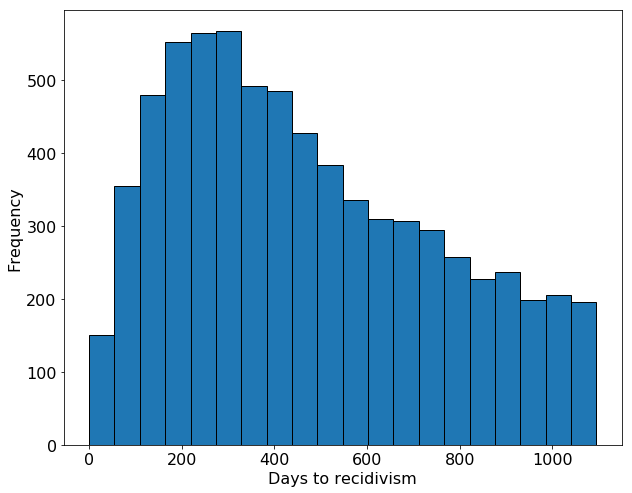

In [92]:
ax =recidivism_data[recidivism_data['Days to Recidivism'] != '0']['Days to Recidivism']. \
astype(float).plot(kind='hist', bins=20, ec='black',figsize=(10,8))
ax.set_xlabel("Days to recidivism")
plt.savefig("hist_daysToRecidivism")

The values for the 'Days to Recidivism'indicates 'NaN' has 14,619 records. These records are actually for individuals who did not return to prison. Convert 'NaN' to 0 for convenience.

In [48]:
recidivism_data['Days to Recidivism'].value_counts(dropna=False)

0         14584
287.0        22
231.0        20
330.0        19
292.0        19
474.0        19
210.0        18
336.0        18
169.0        18
189.0        18
314.0        17
175.0        16
181.0        16
188.0        16
455.0        16
209.0        16
272.0        16
238.0        16
120.0        16
273.0        16
275.0        16
281.0        16
407.0        16
649.0        16
386.0        16
133.0        16
224.0        16
350.0        15
211.0        15
511.0        15
          ...  
970.0         1
1010.0        1
1020.0        1
999.0         1
997.0         1
790.0         1
900.0         1
800.0         1
985.0         1
479.0         1
746.0         1
1051.0        1
814.0         1
1057.0        1
1063.0        1
611.0         1
1066.0        1
834.0         1
840.0         1
848.0         1
937.0         1
856.0         1
934.0         1
587.0         1
863.0         1
1088.0        1
927.0         1
597.0         1
876.0         1
836.0         1
Name: Days to Recidivism

**New Conviction Offense Classification**

In [49]:
recidivism_data['New Conviction Offense Classification'].value_counts(dropna=False)

No New Conviction                           14584
Unknown                                      1963
D Felony                                     1900
Aggravated Misdemeanor                       1282
C Felony                                      869
Felony - Enhancement to Original Penalty      517
Serious Misdemeanor                           227
B Felony                                      222
Public Order                                   13
A Felony                                       10
Simple Misdemeanor                              9
Special Sentence 2005                           6
Violent                                         4
Drug                                            2
Other Misdemeanor                               2
Felony - Mandatory Minimum                      1
Name: New Conviction Offense Classification, dtype: int64

There are 16,582 'NaN' values for the attribute 'New Conviction Offense Classification'. This includes instances where there was no recidivism. Convert 'NaN' to 'No New Conviction' for those instances.

In [50]:
recidivism_data['New Conviction Offense Classification'].value_counts(dropna=False)

No New Conviction                           14584
Unknown                                      1963
D Felony                                     1900
Aggravated Misdemeanor                       1282
C Felony                                      869
Felony - Enhancement to Original Penalty      517
Serious Misdemeanor                           227
B Felony                                      222
Public Order                                   13
A Felony                                       10
Simple Misdemeanor                              9
Special Sentence 2005                           6
Violent                                         4
Drug                                            2
Other Misdemeanor                               2
Felony - Mandatory Minimum                      1
Name: New Conviction Offense Classification, dtype: int64

Convert the remaining 'NaN' to 'Unknown'

In [51]:
recidivism_data['New Conviction Offense Classification'].value_counts(dropna=False)

No New Conviction                           14584
Unknown                                      1963
D Felony                                     1900
Aggravated Misdemeanor                       1282
C Felony                                      869
Felony - Enhancement to Original Penalty      517
Serious Misdemeanor                           227
B Felony                                      222
Public Order                                   13
A Felony                                       10
Simple Misdemeanor                              9
Special Sentence 2005                           6
Violent                                         4
Drug                                            2
Other Misdemeanor                               2
Felony - Mandatory Minimum                      1
Name: New Conviction Offense Classification, dtype: int64

**New Conviction Offense Type**

In [52]:
recidivism_data['New Conviction Offense Type'].value_counts(dropna=False)

No New Conviction    14584
Unknown               1963
Drug                  1474
Property              1393
Public Order           987
Violent                806
Other                  385
Flight/Escape           12
Assault                  3
Drug Possession          2
Traffic                  1
Sex                      1
Name: New Conviction Offense Type, dtype: int64

There are 16,582 'NaN' values for the attribute 'New Conviction Offense Type'. This includes instances where there was no recidivism. Convert 'NaN' to 'No New Conviction' for those instances.

In [53]:
recidivism_data['New Conviction Offense Type'].value_counts(dropna=False)

No New Conviction    14584
Unknown               1963
Drug                  1474
Property              1393
Public Order           987
Violent                806
Other                  385
Flight/Escape           12
Assault                  3
Drug Possession          2
Traffic                  1
Sex                      1
Name: New Conviction Offense Type, dtype: int64

Convert the remaining 'NaN' to 'Unknown'

In [54]:
recidivism_data['New Conviction Offense Type'].value_counts(dropna=False)

No New Conviction    14584
Unknown               1963
Drug                  1474
Property              1393
Public Order           987
Violent                806
Other                  385
Flight/Escape           12
Assault                  3
Drug Possession          2
Traffic                  1
Sex                      1
Name: New Conviction Offense Type, dtype: int64

**New Conviction Offense Sub Type**

In [55]:
recidivism_data['New Conviction Offense Sub Type'].value_counts(dropna=False)

No New Conviction       14584
Unknown                  1982
Trafficking              1005
Assault                   603
Theft                     595
Burglary                  469
Drug Possession           431
Other Criminal            376
OWI                       298
Forgery/Fraud             247
Traffic                   182
Other Public Order        164
Alcohol                   128
Flight/Escape             126
Weapons                    82
Other Violent              68
Vandalism                  55
Robbery                    52
Sex                        44
Other Drug                 38
Murder/Manslaughter        30
Arson                      25
Kidnap                     16
Prostitution/Pimping        7
Animals                     2
Other Property              1
Stolen Property             1
Name: New Conviction Offense Sub Type, dtype: int64

There are 16,601 'NaN' values for the attribute 'New Conviction Offense Sub Type'. This includes instances where there was no recidivism. Convert 'NaN' to 'No New Conviction' for those instances.

In [56]:
recidivism_data['New Conviction Offense Sub Type'].value_counts(dropna=False)

No New Conviction       14584
Unknown                  1982
Trafficking              1005
Assault                   603
Theft                     595
Burglary                  469
Drug Possession           431
Other Criminal            376
OWI                       298
Forgery/Fraud             247
Traffic                   182
Other Public Order        164
Alcohol                   128
Flight/Escape             126
Weapons                    82
Other Violent              68
Vandalism                  55
Robbery                    52
Sex                        44
Other Drug                 38
Murder/Manslaughter        30
Arson                      25
Kidnap                     16
Prostitution/Pimping        7
Animals                     2
Other Property              1
Stolen Property             1
Name: New Conviction Offense Sub Type, dtype: int64

Convert the remaining 'NaN' to 'Unknown'

In [57]:
recidivism_data['New Conviction Offense Sub Type'].value_counts(dropna=False)

No New Conviction       14584
Unknown                  1982
Trafficking              1005
Assault                   603
Theft                     595
Burglary                  469
Drug Possession           431
Other Criminal            376
OWI                       298
Forgery/Fraud             247
Traffic                   182
Other Public Order        164
Alcohol                   128
Flight/Escape             126
Weapons                    82
Other Violent              68
Vandalism                  55
Robbery                    52
Sex                        44
Other Drug                 38
Murder/Manslaughter        30
Arson                      25
Kidnap                     16
Prostitution/Pimping        7
Animals                     2
Other Property              1
Stolen Property             1
Name: New Conviction Offense Sub Type, dtype: int64

**Part of Target Population**

In [58]:
recidivism_data['Part of Target Population'].value_counts(dropna=False)

Yes    11468
No     10143
Name: Part of Target Population, dtype: int64

**Target Population:** Prisoners associated with specific strategies to reduce recidivism rates for offenders supervised as High Normal or Intensive

In [59]:
recidivism_data.shape

(21611, 17)

In [60]:
recidivism_data = recidivism_data.dropna()

In [61]:
recidivism_data.shape

(21611, 17)

In [62]:
recidivism_data['Race - Ethnicity'].isnull().sum()

0

**Recidivism Type:**<br/>
New = Admission to prison with a new conviction for an offense occuring after being released from prison <br/>
Tech = Admission to prison for violation of prison requirenments

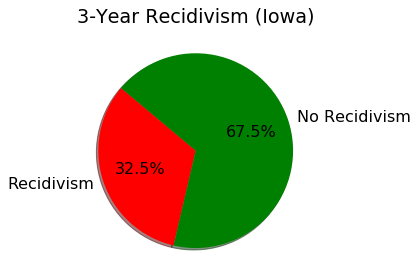

In [63]:
matplotlib.rcParams['axes.titlepad'] = 20 
matplotlib.rcParams['font.size'] = 16
#labels = 'New', 'Technical','No'
labels = 'Recidivism','No Recidivism'
#sizes = [4554, 2473, 14619]
sizes = [7027, 14619]
colors = ['red','green']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('3-Year Recidivism (Iowa)') 
plt.axis('equal')
plt.savefig('recidivism_ratio.eps',format = 'eps',dpi = 1300)
plt.show()